# Predicting Invariant Mass From CERN Electron Collision Data Using Standard Machine Learning Regressive Models

## Objective
**Objective:** The primary purpose of this project is to explore how well different regressive models are able to predict invariant mass (M) from electron collisons. 

## Background
**Data set attribute:**
McCauley, Thomas; (2014). https://opendata.cern.ch/record/304
**Features of the data set:**
1) Run: The run number of the event.
2) Event: The event number.
3) E1, E2: The total energy of the electron (GeV) for electrons 1 and 2.
4) px1,py1,pz1,px2,py2,pz2: The components of the momemtum of the electron 1 and 2 (GeV).
5) pt1, pt2: The transverse momentum of the electron 1 and 2 (GeV).
6) eta1, eta2: The pseudorapidity of the electron 1 and 2.
7) phi1, phi2: The phi angle of the electron 1 and 2 (rad).
8) Q1, Q2: The charge of the electron 1 and 2.
9) M: The invariant mass of two electrons (GeV).

**Data description(taken from kaggle posting)**
This dataset contains 100k dielectron events in the invariant mass range 2-110 GeV for use in outreach and education. These data were selected for use in education and outreach and contain a subset of the total event information. The selection criteria may be different from that used in CMS physics results.



In [47]:
#Imports
#General Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

#Tensorflow imports 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras import callbacks

#Sklearn imports
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.neural_network import MLPRegressor






In [48]:
#Setting the data frame and loading data
df = pd.read_csv('dielectron.csv')
df.head()

,Run,Event,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
0,147115,366639895,58.71410,-7.31132,10.531000,-57.29740,12.82020,-2.20267,2.17766,1,11.2836,-1.032340,-1.88066,-11.0778,2.14537,-2.344030,-2.072810,-1,8.94841
1,147115,366704169,6.61188,-4.15213,-0.579855,-5.11278,4.19242,-1.02842,-3.00284,-1,17.1492,-11.713500,5.04474,11.4647,12.75360,0.808077,2.734920,1,15.89300
2,147115,367112316,25.54190,-11.48090,2.041680,22.72460,11.66100,1.42048,2.96560,1,15.8203,-1.472800,2.25895,-15.5888,2.69667,-2.455080,2.148570,1,38.38770
3,147115,366952149,65.39590,7.51214,11.887100,63.86620,14.06190,2.21838,1.00721,1,25.1273,4.087860,2.59641,24.6563,4.84272,2.330210,0.565865,-1,3.72862
4,147115,366523212,61.45040,2.95284,-14.622700,-59.61210,14.91790,-2.09375,-1.37154,-1,13.8871,-0.277757,-2.42560,-13.6708,2.44145,-2.423700,-1.684810,-1,2.74718


In [49]:
#Cleaning data
#Check for duplicates
print(df.duplicated().sum())

#Remove duplicates
df = df.drop_duplicates()

#Check that duplicates were dropped
print(df.duplicated().sum())

#Checking for null data
print(df.isnull().sum())

#Dropping null data
df = df.dropna()

#Checking that null data was dropped on M 
print(df.isnull().sum())


23
0
Run       0
Event     0
E1        0
px1       0
py1       0
pz1       0
pt1       0
eta1      0
phi1      0
Q1        0
E2        0
px2       0
py2       0
pz2       0
pt2       0
eta2      0
phi2      0
Q2        0
M        85
dtype: int64
Run      0
Event    0
E1       0
px1      0
py1      0
pz1      0
pt1      0
eta1     0
phi1     0
Q1       0
E2       0
px2      0
py2      0
pz2      0
pt2      0
eta2     0
phi2     0
Q2       0
M        0
dtype: int64


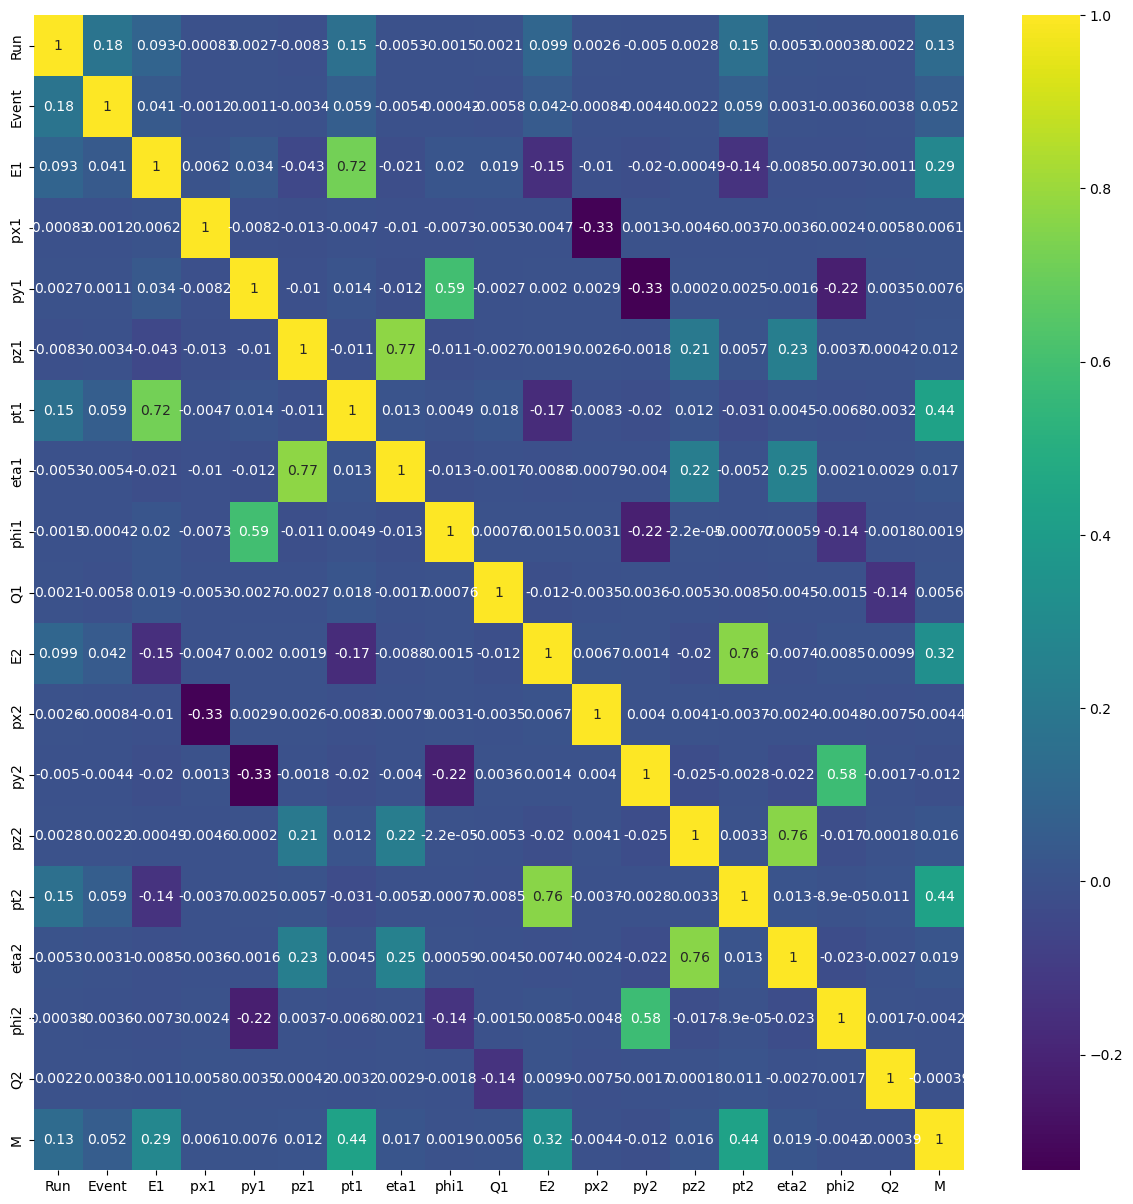

In [50]:
#Finding correlation with seaborn heat map
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), cbar=True, cmap='viridis', annot=True,)
plt.show()

In [51]:
#Spliting training data
X = df.drop(columns='M')
y = df['M']

#Train test split of 80 - 20
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [52]:
#Scaling data
scaler = StandardScaler()

X_train_scl = scaler.fit_transform(X_train)
X_test_scl = scaler.fit_transform(X_test)

In [53]:
#KNN regression

knn = KNeighborsRegressor(n_neighbors=6)

#Training the KNN regression model with data
knn.fit(X_train_scl, y_train)

#Testing the model on test set
knn_pred = knn.predict(X_test_scl)

#R2 score, MQE, and MAE
print(f'This is the R2 score for KNN regression {r2_score(y_test,knn_pred)}')
print(f'This is the MSE for KNN regression {mean_squared_error(y_test, knn_pred)}')
print(f'This is the MAE for KNN regression {mean_absolute_error(y_test, knn_pred)}')

This is the R2 score for KNN regression 0.8691496988655945
This is the MQE for KNN regression 85.31801953622765
This is the MAE for KNN regression 5.904297171947211


With one neigbor:
This is the R2 score for KNN regression 0.7869849410836003
This is the MQE for KNN regression 138.50741117359993
This is the MAE for KNN regression 7.664641044096301

With three neigbors:
This is the R2 score for KNN regression 0.8579793714730155
This is the MQE for KNN regression 92.34515949522715
This is the MAE for KNN regression 6.18995990173015

With five neigbors:
This is the R2 score for KNN regression 0.8669316497471079
This is the MQE for KNN regression 86.52417719398605
This is the MAE for KNN regression 5.978115233995696

Past 5 neigbors R2 change is negligible 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


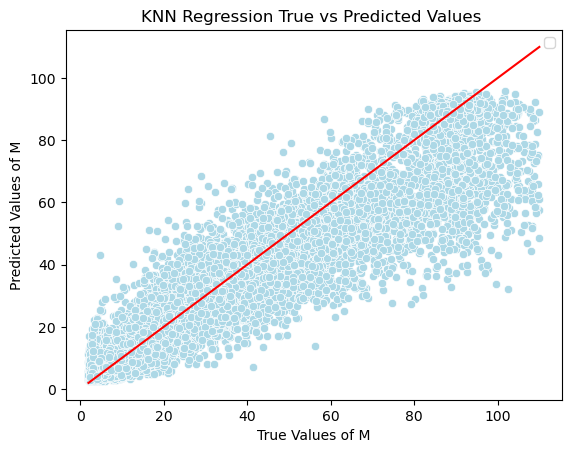

In [54]:
#KNN Regression plot
#Making the plot
sns.scatterplot(x = y_test, y = knn_pred, color='lightblue')
#calculating true value line
knn_max = y_test.max()
knn_min = y_test.min()
#plotting true value line
sns.lineplot(x = [knn_max, knn_min], y = [knn_max, knn_min], color='red')

#Labeling plot
plt.xlabel('True Values of M')
plt.ylabel('Predicted Values of M')
plt.title('KNN Regression True vs Predicted Values ')
plt.legend()
plt.show()

## Linear Regression

In [55]:
#Creating and training the data on linear regression model
lin_mod = LinearRegression()
lin_mod = lin_mod.fit(X_train_scl, y_train)

#testing model on test set
lin_pred = lin_mod.predict(X_test_scl)

print(f'This is the R2 score for linear regression {r2_score(y_test,lin_pred)}')
print(f'This is the MSE for linear regression {mean_squared_error(y_test, lin_pred)}')
print(f'This is the MAE for linear regression {mean_absolute_error(y_test, lin_pred)}')

This is the R2 score for linear regression 0.4098307084725862
This is the MQE for linear regression 384.80671964596695
This is the MAE for linear regression 14.24574106268221


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


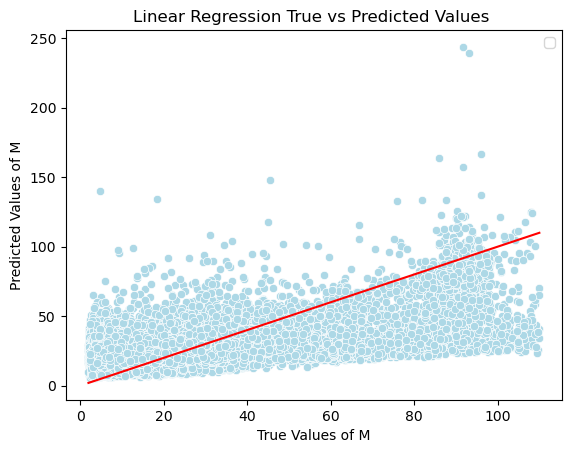

In [56]:
#Linear Regression plot
#Making the plot
sns.scatterplot(x = y_test, y = lin_pred, color='lightblue')
#calculating true value line
lin_max = y_test.max()
lin_min = y_test.min()
#plotting true value line
sns.lineplot(x = [lin_max, lin_min], y = [lin_max, lin_min], color='red')

#Labeling plot
plt.xlabel('True Values of M')
plt.ylabel('Predicted Values of M')
plt.title('Linear Regression True vs Predicted Values ')
plt.legend()
plt.show()

## Neural Network Exploration
### Using Scikit MLP model

In [81]:
#Creating and training the MLP model
mlp = MLPRegressor(activation='relu', solver='adam', max_iter=300)
mlp = mlp.fit(X_train_scl, y_train)

#Testing model on test set
mlp_pred = mlp.predict(X_test_scl)

print(f'This is the R2 score for linear regression {r2_score(y_test,mlp_pred)}')
print(f'This is the MSE for linear regression {mean_squared_error(y_test, mlp_pred)}')
print(f'This is the MAE for linear regression {mean_absolute_error(y_test, mlp_pred)}')

This is the R2 score for linear regression 0.9939704107588632
This is the MSE for linear regression 3.931459142324293
This is the MAE for linear regression 1.3906454725998958


/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


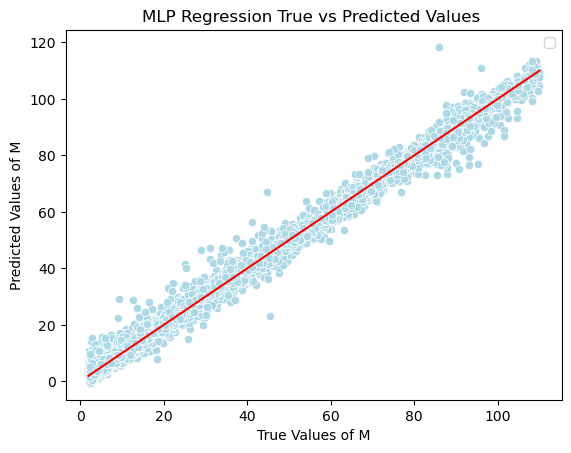

In [82]:
#MLP Regression plot
#Making the plot
sns.scatterplot(x = y_test, y = mlp_pred, color='lightblue')
#calculating true value line
mlp_max = y_test.max()
mlp_min = y_test.min()
#plotting true value line
sns.lineplot(x = [mlp_max, mlp_min], y = [mlp_max, mlp_min], color='red')
#sns.lineplot(x = [0,100], y = [0,100], color='red')

#Labeling plot
plt.xlabel('True Values of M')
plt.ylabel('Predicted Values of M')
plt.title('MLP Regression True vs Predicted Values ')
plt.legend()
plt.show()

## Tensor flow neural network 


In [59]:
X_train_scl.shape

(79913, 18)

In [69]:
nn_model = keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(18,)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])
nn_model.summary()

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_44 (Dense)                │ (None, 256)            │         4,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 113,921 (445.00 KB)

 Trainable params: 113,921 (445.00 KB)

 Non-trainable params: 0 (0.00 B)

In [71]:
#stop = earlystopping = callbacks.EarlyStopping(monitor= 'loss', patience=5, mode='min', restore_best_weights=True)


nn_model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss='mean_squared_error', metrics=['mean_squared_error','mean_absolute_error'])


history = nn_model.fit(X_train_scl, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
1998/1998 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.5743 - mean_absolute_error: 0.5117 - mean_squared_error: 0.5743 - val_loss: 0.6097 - val_mean_absolute_error: 0.5059 - val_mean_squared_error: 0.6097
Epoch 2/100
1998/1998 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.6344 - mean_absolute_error: 0.5265 - mean_squared_error: 0.6344 - val_loss: 0.5559 - val_mean_absolute_error: 0.4737 - val_mean_squared_error: 0.5559
Epoch 3/100
1998/1998 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.6164 - mean_absolute_error: 0.4921 - mean_squared_error: 0.6164 - val_loss: 0.6430 - val_mean_absolute_error: 0.5187 - val_mean_squared_error: 0.6430
Epoch 4/100
1998/1998 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.4644 - mean_absolute_error: 0.4616 - mean_squared_error: 0.4644 - val_loss: 0.6238 - val_mean_absolute_error: 0.5048 - val_mean_squared_error: 0.6238
Epoch 5/100
1998/1998 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.5913 - mean_absolute_error: 0.5150 - mean_squared_error: 0.5913 - val_loss:

In [84]:
nn_pred = nn_model.predict(X_test_scl).flatten()

print(f'This is the R2 score for KNN regression {r2_score(y_test, nn_pred)}')
print(f'This is the MSE for KNN regression {mean_squared_error(y_test, nn_pred)}')
print(f'This is the MAE for KNN regression {mean_absolute_error(y_test, nn_pred)}')


625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 821us/step
This is the R2 score for KNN regression 0.9991032141988057
This is the MSE for KNN regression 0.5847291740468995
This is the MAE for KNN regression 0.5480851506497518


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


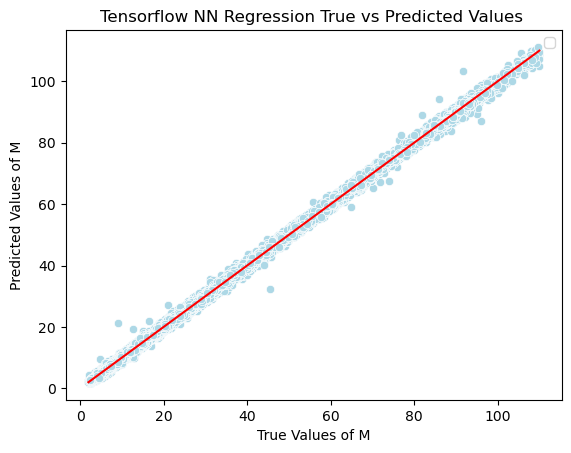

In [95]:
#MLP Regression plot
#Making the plot
sns.scatterplot(x = y_test, y = nn_pred, color='lightblue')
#calculating true value line
nn_max = y_test.max()
nn_min = y_test.min()
#plotting true value line
sns.lineplot(x = [nn_max, nn_min], y = [nn_max, nn_min], color='red')

#Labeling plot
plt.xlabel('True Values of M')
plt.ylabel('Predicted Values of M')
plt.title('Tensorflow NN Regression True vs Predicted Values ')
plt.legend()
plt.show()

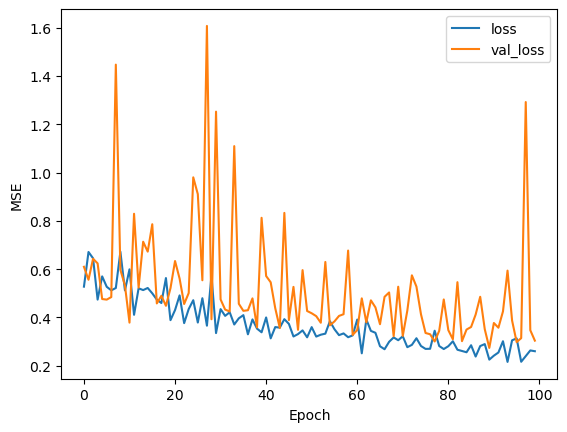

In [94]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()